# NHS 111 Data

Usage/uptake data for the NHS 111 service.

https://www.england.nhs.uk/statistics/statistical-work-areas/nhs-111-minimum-data-set/nhs-111-minimum-data-set-2016-17/

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [3]:
!wget -P data/ https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2016/06/NHS-111-from-Aug10-to-Nov16-web-file.csv

--2017-01-14 16:59:13--  https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2016/06/NHS-111-from-Aug10-to-Nov16-web-file.csv
Resolving www.england.nhs.uk... 54.240.166.101, 54.240.166.39, 54.240.166.184, ...
Connecting to www.england.nhs.uk|54.240.166.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 509128 (497K) [text/csv]
Saving to: 'data/NHS-111-from-Aug10-to-Nov16-web-file.csv'

NHS-111-from-Aug10- 100%[=====================>] 497.20K  --.-KB/s   in 0.09s  

2017-01-14 16:59:14 (5.65 MB/s) - 'data/NHS-111-from-Aug10-to-Nov16-web-file.csv' saved [509128/509128]



In [ ]:
#Detailed Excel data files (require parsers...)
#MDS-Web-File-National-November-2016.xlsx
#MDS-Web-File-North-November-2016.xlsx
#MDS-Web-File-London-November-2016.xlsx
#MDS-Web-File-Midlands-East-England-November-2016.xlsx
#!wget -P data/ https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2016/06/MDS-Web-File-South-November-2016.xlsx

In [99]:
df=pd.read_csv('data/NHS-111-from-Aug10-to-Nov16-web-file.csv',skiprows=4)
df.head()

,Yearnumber,Periodname,Provider Org Code,Provider Name,Commissioner Org Code,Commissioner Org Name,Nhs1 Population SUM,Nhs1 Number Calls Offered SUM,Nhs1 Calls Through 111 SUM,Nhs1 Calls Through Other SUM,...,Nhs1 Recommend To Other SUM,Nhs1 Not Recommend SUM,Nhs1 Given Health Information SUM,Nhs1 Recommended Home Care SUM,Nhs1 Recommended Non Clinical SUM,Nhs1 Time Call Handlers SUM,Nhs1 Time Clinical Staff SUM,Nhs1 Cost Call Handlers SUM,Nhs1 Cost Clinical Staff SUM,Nhs1 Total Other Costs SUM
0,2010-11,Dec-10,111AA4,NOTTINGHAM CITY NHS 111,5EM,Nottingham City PCT,299753,5782,1317.0,4465.0,...,161,1034,164.0,509,361.0,33143.06667,17844.93333,NCA,NCA,NCA
1,2010-11,Jan-11,111AA4,NOTTINGHAM CITY NHS 111,5EM,Nottingham City PCT,303899,5865,1280.0,4585.0,...,177,1236,216.0,389,631.0,28714.61667,17309.8,NCA,NCA,NCA
2,2010-11,Feb-11,111AA4,NOTTINGHAM CITY NHS 111,5EM,Nottingham City PCT,303899,3567,932.0,2635.0,...,121,801,120.0,257,424.0,17761.16667,13719.93333,NCA,NCA,NCA
3,2010-11,Mar-11,111AA4,NOTTINGHAM CITY NHS 111,5EM,Nottingham City PCT,303899,4942,1687.0,3255.0,...,160,1160,201.0,386,573.0,23035.85,17147.86667,NCA,NCA,NCA
4,2011-12,Apr-11,111AA4,NOTTINGHAM CITY NHS 111,5EM,Nottingham City PCT,303899,5797,1596.0,4201.0,...,168,1377,204.0,410,763.0,33396,19839,NCA,NCA,NCA


In [100]:
df.columns

Index(['Yearnumber', 'Periodname', 'Provider Org Code', 'Provider Name',
       'Commissioner Org Code', 'Commissioner Org Name', 'Nhs1 Population SUM',
       'Nhs1 Number Calls Offered SUM', 'Nhs1 Calls Through 111 SUM',
       'Nhs1 Calls Through Other SUM', 'Nhs1 Abandoned Calls SUM',
       'Nhs1 Answered Calls SUM', 'Nhs1 Answered Through 111 SUM',
       'Nhs1 Answered Through Other SUM', 'Nhs1 Answered 60sec SUM',
       'Nhs1 Calls Person Triaged SUM', 'Nhs1 Cnt Caller Terminated SUM',
       'Nhs1 Cnt Caller Referred SUM', 'Nhs1 Cnt Caller Given Info SUM',
       'Nhs1 Cnt Other Reason SUM', 'Nhs1 Transferred To Ca SUM',
       'Nhs1 Wtransferred To Ca SUM', 'Nhs1 Ave Wtransfer Time SUM',
       'Nhs1 Person Offered Call Back SUM',
       'Nhs1 Calls Back Within 10mins SUM', 'Nhs1 Ave Episode Length SUM',
       'Nhs1 Amb Dispatches SUM', 'Nhs1 Recommend To Ae SUM',
       'Nhs1 Recommend To Primcare SUM', 'Nhs1 Rec Contact Prim Com Care SUM',
       'Nhs1 Rec Speak Prim Com 

In [103]:
#Generate a pandas period for time series indexing purposes
#Create a date from each month (add the first date of the month) then set to period
#Note: if the datetime is an index, drop the .dt.
df['_period']=pd.to_datetime(('01-'+df['Periodname']), \
                             format='%d-%b-%y').dt.to_period('M')
df[['Yearnumber','Periodname','_period']].head()

,Yearnumber,Periodname,_period
0,2010-11,Dec-10,2010-12
1,2010-11,Jan-11,2011-01
2,2010-11,Feb-11,2011-02
3,2010-11,Mar-11,2011-03
4,2011-12,Apr-11,2011-04


### Quick look at data grouped by period and provider name, with summed A&E referrals per provider
df.groupby(['_period','Provider Name'])['Nhs1 Recommend To Ae SUM'].sum().head()

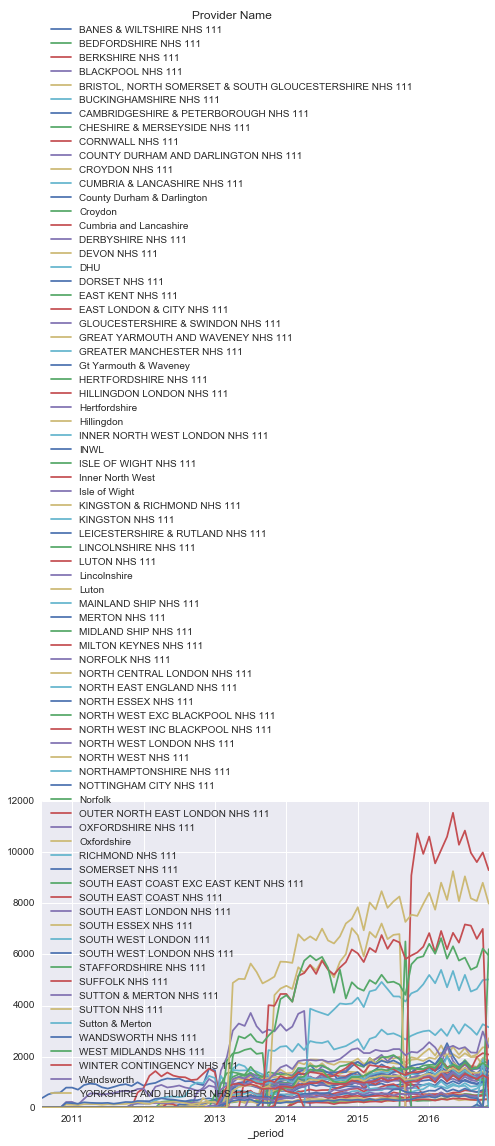

In [17]:
#The groupby returns an index with period and provider;
#Find total number of recommendations to A&E in each group
#unstack on provider, fill NA with 0
df.groupby(['_period','Provider Name'])['Nhs1 Recommend To Ae SUM'].sum().unstack("Provider Name").fillna(0).plot();

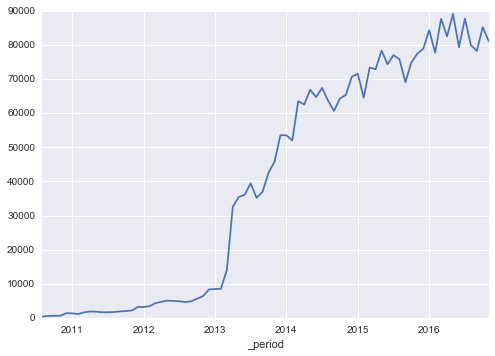

In [18]:
#Plot the total A&E recommendations
df.groupby(['_period'])['Nhs1 Recommend To Ae SUM'].sum().fillna(0).plot()

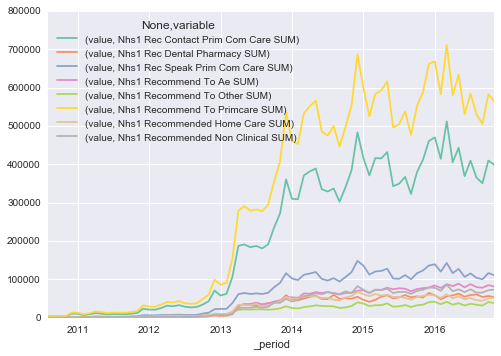

In [20]:
#Chart for all recommendation columns
cols=[c for c in df.columns if c.startswith('Nhs1 Rec')]
sns.set_palette("Set2", len(cols))
pd.melt(df,id_vars='_period',value_vars=cols
       ).groupby(['_period','variable']).sum().unstack(1).fillna(0).plot();

In [21]:
#A&E referrals: https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/statistical-work-areasae-waiting-times-and-activityae-attendances-and-emergency-admissions-2016-17/
!wget -P data/ https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2016/06/Quarterly-timeseries-Nov-2016.xls

--2017-01-14 17:09:48--  https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2016/06/Quarterly-timeseries-Nov-2016.xls
Resolving www.england.nhs.uk... 54.240.166.184, 54.240.166.39, 54.240.166.61, ...
Connecting to www.england.nhs.uk|54.240.166.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91648 (90K) [application/vnd.ms-excel]
Saving to: 'data/Quarterly-timeseries-Nov-2016.xls'

Quarterly-timeserie 100%[=====================>]  89.50K  --.-KB/s   in 0.02s  

2017-01-14 17:09:49 (5.75 MB/s) - 'data/Quarterly-timeseries-Nov-2016.xls' saved [91648/91648]



In [86]:
df2=pd.read_excel('data/Quarterly-timeseries-Nov-2016.xls',skiprows=16,na_values='-').dropna(how='all')
df2['Year'].fillna(method='ffill',inplace=True)
#First group of cols are A&E attendances. I really need to sort out how to read multirow headers!
#Tidy data to remove empty rows at end of table, empty columns
df2.dropna(axis=0,subset=['Quarter'],inplace=True)
df2.dropna(axis=1,how='all',inplace=True)
df2.head()

,Year,Quarter,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Type 1 Departments - Major A&E.1,Type 2 Departments - Single Specialty.1,Type 3 Departments - Other A&E/Minor Injury Unit.1,Total Attendances > 4 hours,Percentage in 4 hours or less (type 1),Percentage in 4 hours or less (all),Emergency Admissions via Type 1 A&E,Emergency Admissions via Type 2 A&E,Emergency Admissions via Type 3 and 4 A&E,Total Emergency admissions via A&E,Other Emergency admissions (i.e not via A&E),Total emergency admissions,Number of patients spending >4 hours from decision to admit to admission,Number of patients spending >12 hours from decision to admit to admission
1,2004-05,Q1: April - June,3377850.0,159966.0,964762.0,4502578.0,232110.0,2612.0,3305.0,238027.0,0.931285,0.947135,651785.0,6778.0,7830.0,666393.0,NaN,NaN,27665.0,NaN
2,2004-05,Q2: July - Sept,3381219.0,156697.0,1018779.0,4556695.0,182554.0,1830.0,2625.0,187009.0,0.946009,0.958960,673452.0,6670.0,8256.0,688378.0,NaN,NaN,20989.0,NaN
3,2004-05,Q3: Oct - Dec,3257398.0,150643.0,966886.0,4374927.0,136953.0,1415.0,1364.0,139732.0,0.957956,0.968061,705901.0,6802.0,8691.0,721394.0,NaN,NaN,19831.0,NaN
4,2004-05,Q4: Jan - Mar,3249353.0,151926.0,1001701.0,4402980.0,115978.0,982.0,687.0,117647.0,0.964307,0.973280,724814.0,6975.0,5414.0,737203.0,NaN,NaN,24178.0,NaN
5,2005-06,Q1: April - June,3520931.0,165801.0,1172846.0,4859578.0,83845.0,742.0,555.0,85142.0,0.976187,0.982480,719644.0,7717.0,6048.0,733409.0,NaN,NaN,12991.0,NaN


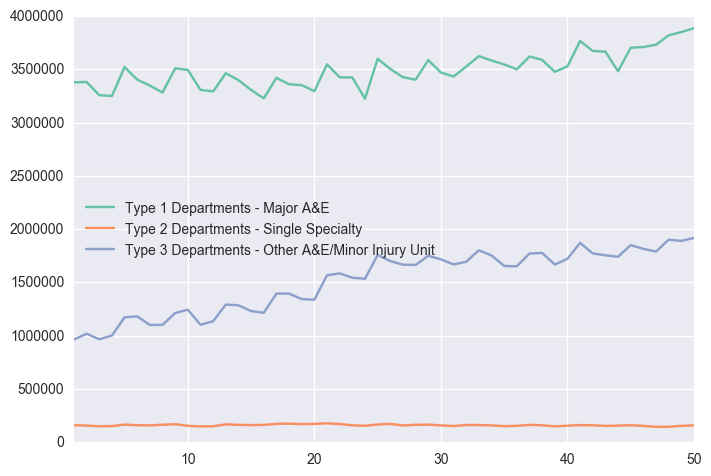

In [97]:
df2[['Type 1 Departments - Major A&E',
     'Type 2 Departments - Single Specialty',
     'Type 3 Departments - Other A&E/Minor Injury Unit']].plot();

In [88]:
df2['period']=df2['Year']+' '+df2['Quarter']

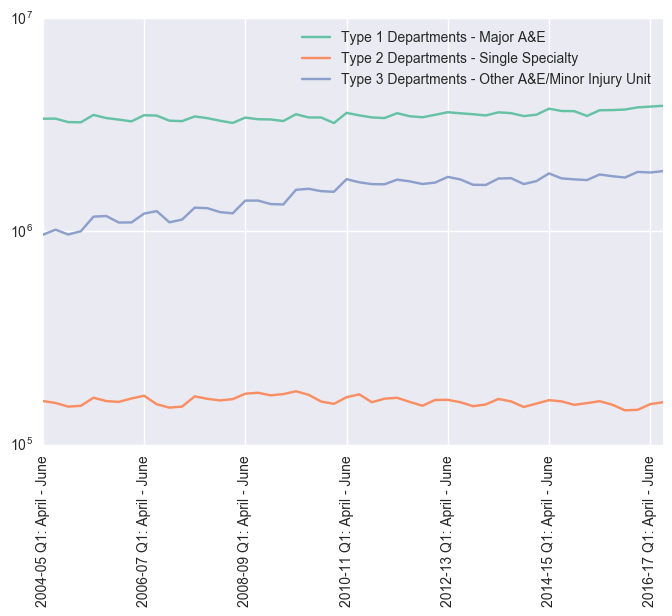

In [89]:
ax=df2[['Type 1 Departments - Major A&E',
     'Type 2 Departments - Single Specialty',
     'Type 3 Departments - Other A&E/Minor Injury Unit']].plot(logy=True, xticks=df2.index, rot=90)
#ax.set_xticklabels(df2['period'])
ticks = ax.xaxis.get_ticklocs()
ax.xaxis.set_ticks(ticks[::8])
ax.xaxis.set_ticklabels(df2['period'][::8]);

In [90]:
def getMonthYear(row):
    month=row['Quarter'].split(':')[1].split('-')[0].strip()
    year=int(row['Year'].split('-')[0])
    if month in ['Jan']:
        year= year+1
    #Following the conversion, the _quarter year specifies the calendar year in which the financial year ends
    return pd.to_datetime("01-{}-{}".format(month[:3],year),format='%d-%b-%Y')

df2['_quarter']=pd.PeriodIndex(df2.apply(getMonthYear,axis=1), freq='Q-MAR')
df2[['Year','Quarter','_quarter']].head()
#Note the syntax - the _quarter year specifies the financial end year

,Year,Quarter,_quarter
1,2004-05,Q1: April - June,2005Q1
2,2004-05,Q2: July - Sept,2005Q2
3,2004-05,Q3: Oct - Dec,2005Q3
4,2004-05,Q4: Jan - Mar,2005Q4
5,2005-06,Q1: April - June,2006Q1


In [94]:
#Review what the start and end dates of the corresponding periods are
tmp=df2.set_index('_quarter')
tmp['qstart']= tmp.index.asfreq('D', 's')
tmp['qend']=tmp.index.asfreq('D', 'e')
tmp[['Year','Quarter','qstart','qend']].head()

,Year,Quarter,qstart,qend
_quarter,,,,
2005Q1,2004-05,Q1: April - June,2004-04-01,2004-06-30
2005Q2,2004-05,Q2: July - Sept,2004-07-01,2004-09-30
2005Q3,2004-05,Q3: Oct - Dec,2004-10-01,2004-12-31
2005Q4,2004-05,Q4: Jan - Mar,2005-01-01,2005-03-31
2006Q1,2005-06,Q1: April - June,2005-04-01,2005-06-30


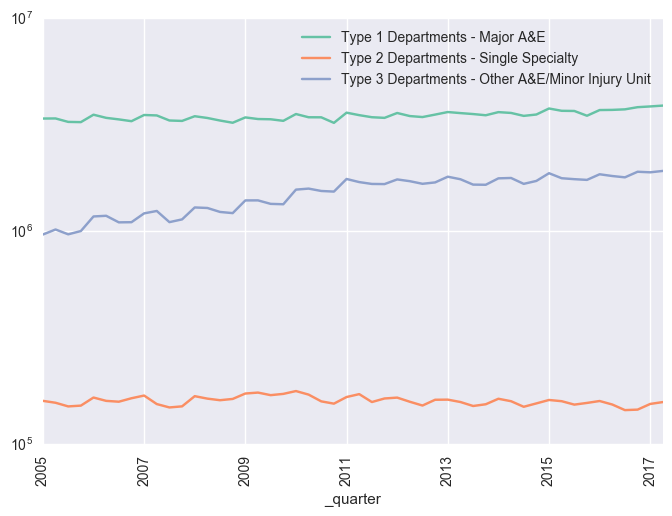

In [96]:
#The (calendar) year looks wrong to me in the below
#Need to somehow emphasis the year is the end calendar year of the corresponding (plotted) financial year?
df2.set_index('_quarter')[['Type 1 Departments - Major A&E',
     'Type 2 Departments - Single Specialty',
     'Type 3 Departments - Other A&E/Minor Injury Unit']].plot(logy=True, rot=90);